## The Uniform Distribution

Load libraries. We use the scipy.stats library.

In [4]:
# Scipy library has been loaded and this is how we can import the module
import scipy.stats as stats

Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

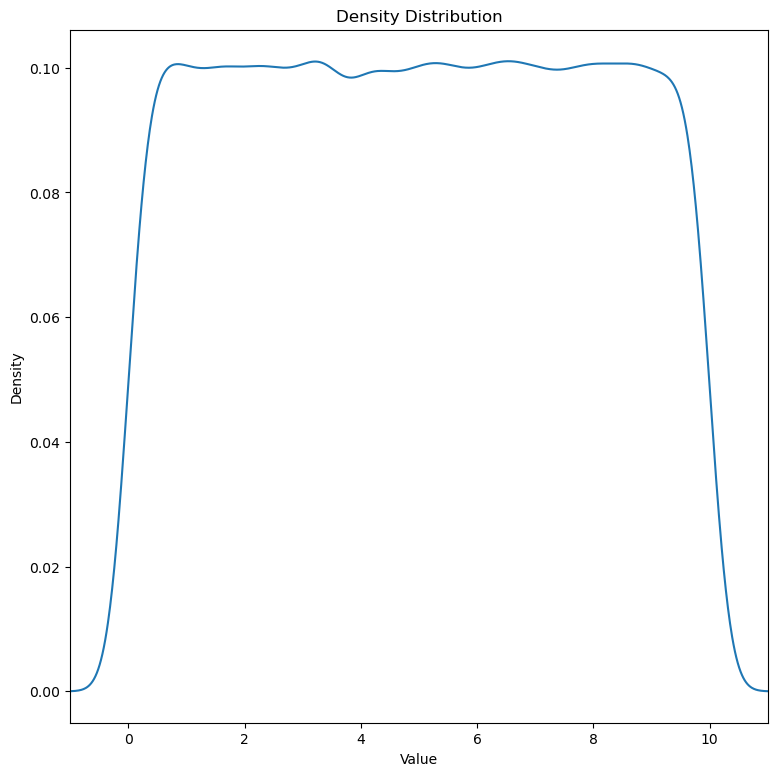

In [46]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)

# here we can generate 100,000 random numbers from a uniform distribution between 0 and 10
random_data = stats.uniform.rvs(loc=0, scale=10, size=100000)

# Here we have plotted the density distribution
kde = stats.gaussian_kde(random_data)
x = np.linspace(-1, 11, 1000)
y = kde(x)

plt.figure(figsize=(9, 9))
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Distribution')
plt.xlim(-1, 11)
plt.show()



Check scipy libraries and use useful functions. 

cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5. 

In [26]:
import numpy as np
from scipy.stats import uniform


dist = uniform(0, 10)


cdf = dist.cdf(2.5)

print(cdf)

0.25


ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [27]:
import scipy.stats as stats

probability = 0.4
cutoff_value = stats.uniform.ppf(probability, loc=0, scale=10)

print(cutoff_value)

4.0


Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [28]:
import scipy.stats as stats

# Here we have creathed a uniform distribution between 0 and 10
uniform_dist = stats.uniform(loc=0, scale=10)

# Now this is to define x values to evaluate the probability density
x_values = [-1, 2, 5, 8, 11]

for x in x_values:
    if 0 <= x <= 10:
        density = uniform_dist.pdf(x)
    else:
        density = 0.0
    print(f"Density at x value {x}: {density}")

Density at x value -1: 0.0
Density at x value 2: 0.1
Density at x value 5: 0.1
Density at x value 8: 0.1
Density at x value 11: 0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following. 

In [30]:
import numpy as np
from scipy.stats import norm

# This is here to create a normal distribution object
dist = norm(0, 1)

below_1 = (dist.cdf(-1)) 

above_1 = (1-dist.cdf(1)) 

between_1_and_1 = (dist.cdf(1) - dist.cdf(-1)) 
# Here we can print the data
print("Percentage below -1:", below_1, "%")
print("Percentage above 1:", above_1, "%")
print("Percentage between -1 and 1:", between_1_and_1, "%")

Percentage below -1: 0.15865525393145707 %
Percentage above 1: 0.15865525393145707 %
Percentage between -1 and 1: 0.6826894921370859 %


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.  

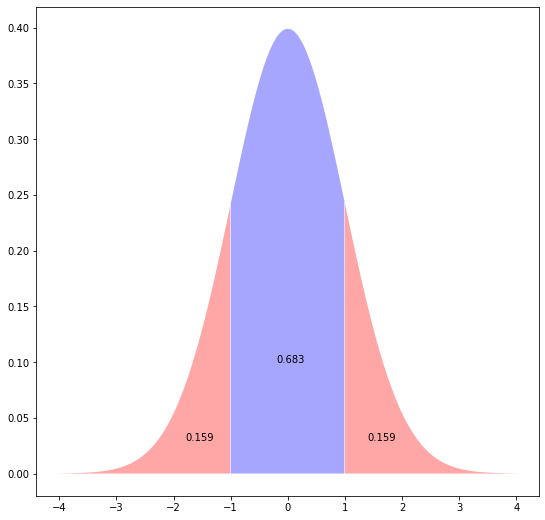


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [31]:
import numpy as np
from scipy.stats import norm
# To create a normal distribution 
dist = norm(0, )
# Now this is to calculate the PPF values for the 2.5% and 97.5% cutoffs
ppf_1 = dist.ppf(0.025)
ppf_2 = dist.ppf(0.975)
# Printing the results
print("ppf for 2.5% cutoff:", ppf_1)
print("ppf for 97.5% cutoff:", ppf_2)

ppf for 2.5% cutoff: -1.9599639845400545
ppf for 97.5% cutoff: 1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5. 

Create a random binomial distribution data "fair_coin_flips" in the code line below.

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts  11  84  390  1221  1990  2478  2052  1185  469  113   7


array([[<Axes: title={'center': '0'}>]], dtype=object)

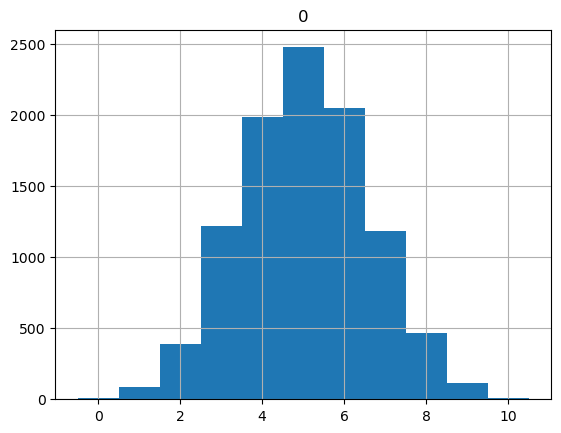

In [35]:
import scipy.stats as stats
import numpy as np
import pandas as pd

num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.5

fair_coin_flips = np.random.binomial(num_flips_per_trial, success_prob, size=num_trials)

print(pd.crosstab(index="counts", columns=fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)

The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. 
Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1  10  50  258  917  1962  3030  2735  1037


array([[<Axes: title={'center': '0'}>]], dtype=object)

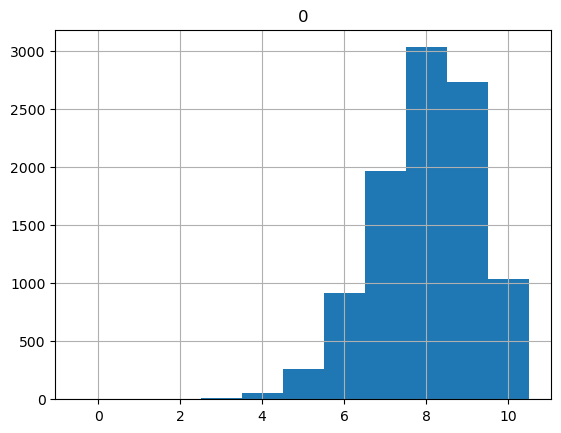

In [45]:
import scipy.stats as stats
import numpy as np
import pandas as pd

num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.8

biased_coin_flips = np.random.binomial(num_flips_per_trial, success_prob, size=num_trials)

print(pd.crosstab(index="counts", columns=biased_coin_flips))

pd.DataFrame(biased_coin_flips).hist(range=(-0.5, 10.5), bins=11)

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [38]:
import scipy.stats as stats

# This is to set the parameters for the binomial distribution
num_flips_per_trial = 10
success_rate = 0.8

# Here we are calculating the probability of achieving 5 heads or less with 10 flips
probability = stats.binom.cdf(5, num_flips_per_trial, success_rate)

print(f"Probability of achieving 5 heads or less with 10 flips: {probability:.4f}")

Probability of achieving 5 heads or less with 10 flips: 0.0328


Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [39]:
import scipy.stats as stats

num_flips_per_trial = 10
success_rate = 0.8

probability = 1 - stats.binom.cdf(8, num_flips_per_trial, success_rate)

print(f"Probability of achieving 9 heads or more with 10 flips: {probability:.4f}")

Probability of achieving 9 heads or more with 10 flips: 0.3758


For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k. 
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [40]:
import scipy.stats as stats

num_flips_per_trial = 10
success_rate = 0.5

probability_mass = stats.binom.pmf(5, num_flips_per_trial, success_rate)

print(f"Probability mass at 5 heads with success rate of 0.5 for 10 flips: {probability_mass:.4f}")

Probability mass at 5 heads with success rate of 0.5 for 10 flips: 0.2461


What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [37]:
import scipy.stats as stats

num_flips_per_trial = 10
success_rate = 0.8

probability_mass = stats.binom.pmf(8, num_flips_per_trial, success_rate)

print(f"Probability mass at 8 heads with success rate of 0.8 for 10 flips: {probability_mass:.4f}")

Probability mass at 8 heads with success rate of 0.8 for 10 flips: 0.3020


## Wrap Up

Extra information of Exponential Distributions and Poisson Distributions will be given in the solution. 


Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
